# Guided Project: Classifying Heart Disease

### Import libraries and explore the data

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
heart = pd.read_csv("heart_disease.csv")

In [91]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [92]:
heart["ca"].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [93]:
heart["thal"].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

The "ca" and the "thal" columns have "?" as values in a few rows. As the rows are only few, we can delete the entire rows from the data set.

In [94]:
heart["present"].value_counts()

present
0    164
1    139
Name: count, dtype: int64

In [95]:
heart.describe(include="all")

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,1.000000


Note that these columns may have outliers, which we may need to investigate further: "chol", "oldpeak"

It appears that columns that need dummy variables are already in that form, so no need to do anything further.

### Investigate the potential predictors to decide which would be good regression predictors

In [96]:
potential_predictors = list(heart.columns[1:-1])
potential_predictors

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

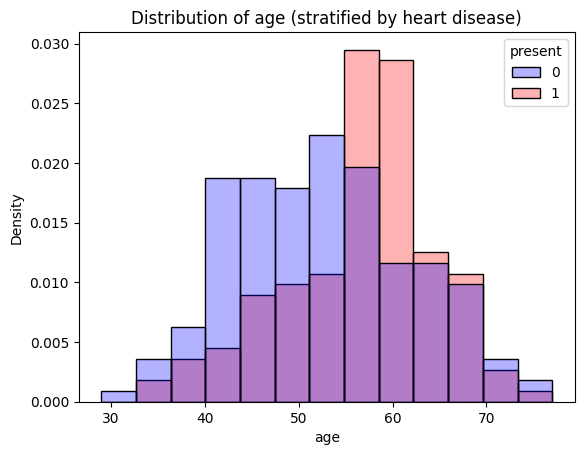

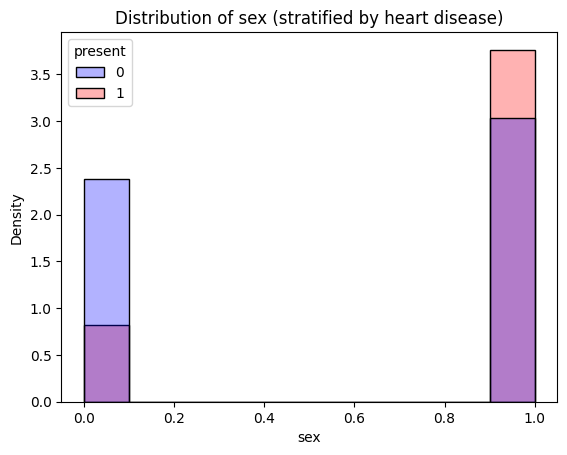

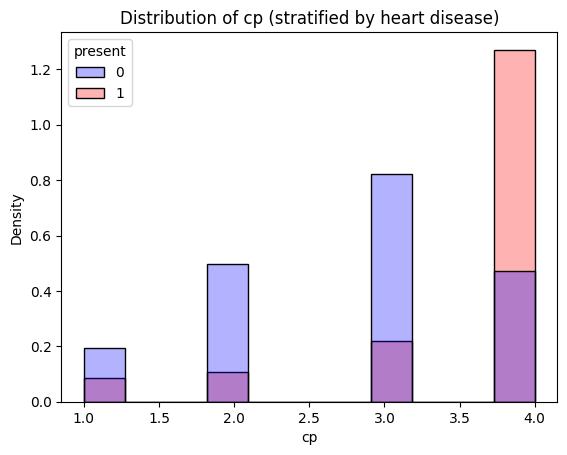

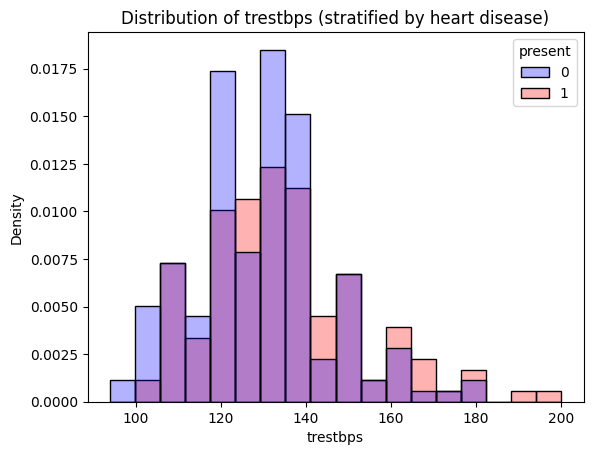

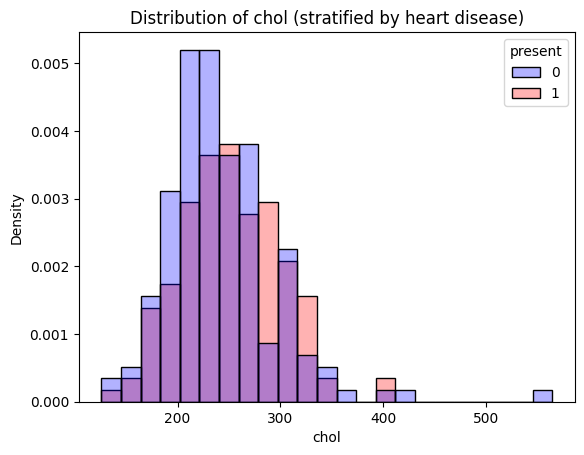

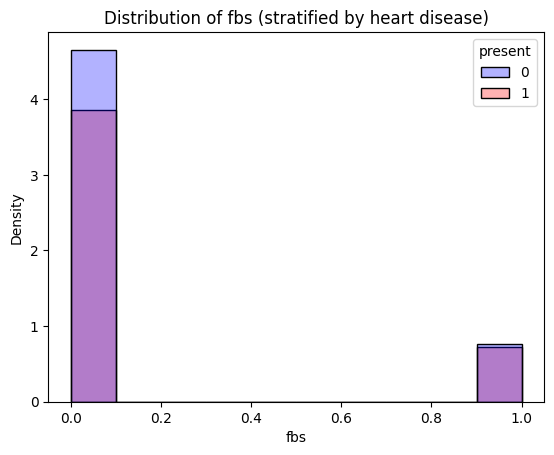

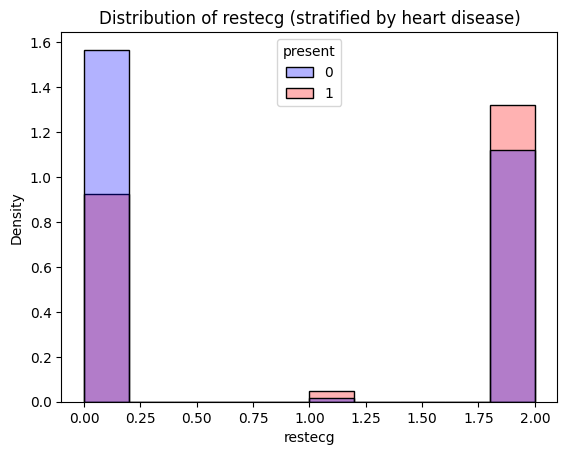

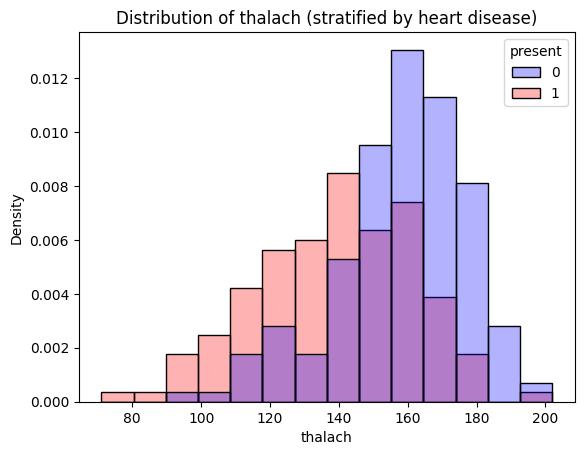

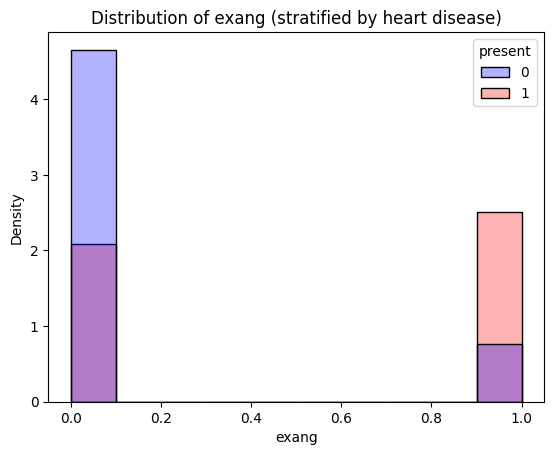

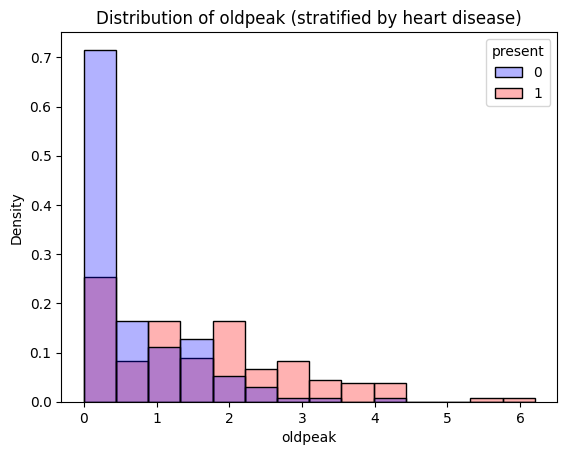

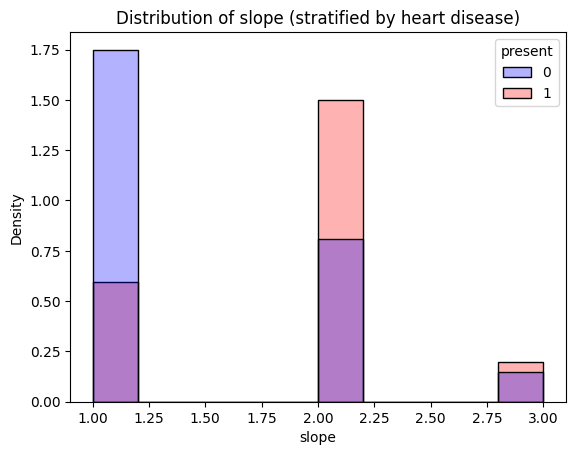

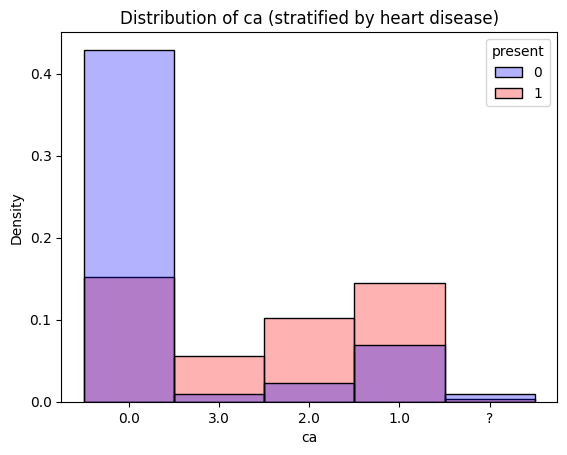

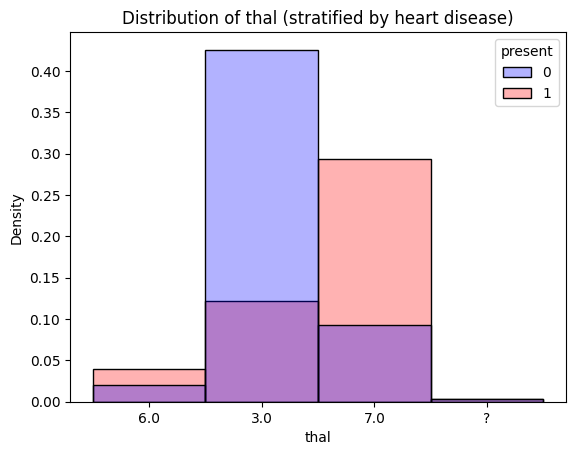

In [97]:
# Note that I have plotted the probability density function rather than count, because the samples in the category of those with heart disease is not equal to those without heart disease.

for predictor in potential_predictors:
    sns.histplot(data=heart, x=predictor, hue="present", stat="density", alpha=0.3, palette={0: "blue", 1: "red"})
    plt.xlabel(predictor)
    plt.title(f"Distribution of {predictor} (stratified by heart disease)")
    plt.show()

##### Age
The distrbution is shifted to the right for those with heart disease, and therefore age is a predictor of heart disease.

##### Sex
For those with heart disease, you can see that the number of males is almost 5 times the number of females. Whereas in the distribution for those without heart disease, the difference between the number of males and females is not as stark as the first discussed distribution. Hence, it appears that males are more likely to have heart disease than females.

##### Chest pain ("cp")
One would typically think that chest pain is a sign of heart disease. However, the above suggests this is not the case. For those with typical angina ("1"): the likelihood of people without heart disease is twice as higher than those with it. Similarly, for those who don't have chest pain ("4"): the likelihood of such a person to fall into the category of those with heart disease is more than double the likelihood of falling into the category of not having heart disease. Hence, it seems chest pain is not a significant predictor of heart disease.

##### Resting blood pressure ("trestbps")

There are more observations falling to the right of the distribtion for those with heart disease, indicating that a higher resting bps is an indicator of heart disese. However, this is only a slight difference. Furthermore, the mean of the distributions for those with heart disease and those without seems to be in the same range of 120-140. Therefore, resting bps may be an indicator for heart disease but a weak one.

##### Cholesterol ("chol")
The graph of those with heart disease seems to have a mean around the 250 mark, whereas the graph for those without heart disease is in the lower 200s range. This indicates, cholesterol is a predictor of heart disease.

##### Fasting blood sugar ("fbs")
In the graph of those with heart disease, people are almost five times more likely to not have fbs ("0") rather than have it, indicating that fbs is not a predictor of heart disease. This is further cemented by the fact that the distribution is very similar for those without heart disease.

##### Resting ECG ("restecg")
In the distrubution of those with heart disease, people are around 1.5 times more likely to have left ventricular enlargement (category "2") than have a normal ECG recording, indicating that it is an indicator of heart disease. Furthermore, the distribution of those without heart disease is the opposite; there is a higher porportion of people with a normal recording than with a category 2 recording, further indicating that resting ECG is a predictor of heart disease.

##### Maximum heart rate achieved during a stress test ("thalach")
The distribution of those without heart disease is shifted to the right compared to those with heart disease, indicating it'd be a good predictor of heart disease.

##### Whether exercise has caused chest pain ("exang")
In the distribution of those with heart disease, people are almost 1.5 times more likely to have chest pain during exercise (category "1"), indicating it'd be a good predictor of heart disease. Furthermore, the distribution of those without heart disease is opposite to those with heart disease, further indicating it as a good predictor. 

However, there could be chance that this predictor and "thalach" are highly correlated which could disturb the logistic regression.

##### ST-depression caused by exercise ("oldpeak")
In the distribution of those with heart disease, the density of each of the bins is roughly the same for an oldpeak of 1-3, therefore not allowing us to make any predictions about the trend between heart disease and oldpeak. However, if you look at the distribution of people without heart disease, there is a much higher proportion of people with an oldpeak of 0, and the density becomes smaller as the oldpeak increases. This indicates, those with heart disease are more likely to have oldpeak values of 1 or higher whereas those without heart disease are likely to have a value of 0.

However again, there could be chance that this predictor, "exang" and "thalach" are highly correlated which could disturb the logistic regression.

##### Slope of the peak exercise ST-segment ("slope")
In the distribution of those with heart disease, the density of people with a flat ("2") slope is more than double an upsloping curve, indicating that those with a flat curve are likely to have heart disease. Furthermore, the distribution of those without heart disease is opposite to this one, further indicating that a flat slope (as opposed to an upslope) is a predictor of heart disease.

However again, there could be chance that this predictor, "exang", "thalach" and "oldpeak" are highly correlated which could disturb the logistic regression.

##### Number of major vessels coloured by fluoroscopy ("ca")
In the distribution of those with heart disease, the density of each of the bins is roughly the same for a ca of 0-3, therefore not allowing us to make any predictions about the trend between heart disease and ca However, if you look at the distribution of people without heart disease, there is a much higher porportion of people with a ca 0, and the density becomes smaller as the ca number increases. This indicates, those with without heart disease are likely to have a value of 0 compared to those with heart disease, and it'd therefore be a good predictor.

##### Thalassemia ("thal")
"3": normal
"6": fixed defects (no blood flow to some parts of the heart)
"7": reversible defect (temporary blood flow issues to the heart)

In the distrbution of those with heart disease, there is a higher proportion of those with a reversible defect than those who are in the normal category, indicating it'd be a predictor for heart disease. This is furthered by the fact that the distribution of those without heart disease is opposite. 

##### Summary of predictors
Therefore, it appears that most of the potential predictors would be good predictors. However, chest pain ("cp") and fasting blood sugar ("fbs") don't seem to be good predictors. Furthermore, resting blood pressure ("trestbps") seems to be a weak predictor. 

Additionally, the potential predictors, "exang", "thalach", "oldpeak" and "slope" seem to be correlated with each other, which may disturb the logistic regression.

Therefore, we'll use the following predictors for our model: 'age','sex', 'trestbps', 'chol','restecg', 'thalach', 'ca', 'thal'.

### Dividing the data set into training and test data

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
# Eliminate all the rows with "?" in the "thal" and "ca" columns
heart = heart.loc[(heart["thal"] != "?") & (heart["ca"] != "?"), :]

In [100]:
X = heart.drop(["Unnamed: 0", "present"], axis=1)

In [101]:
y = heart["present"]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=733)

In [103]:
values = pd.DataFrame({"y_train": y_train.value_counts(), "y_test": y_test.value_counts()})
values

,y_train,y_test
present,,
0,119,41
1,118,19


In [104]:
# Both the training and test data sets have cases and non-cases so this is fine.

values

,y_train,y_test
present,,
0,119,41
1,118,19


### Build the model using all the predictors first

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
# Scaling the predictors allows the model to converge.
# Scale on the training data only (i.e. calculate the mean, std dev on the training data)...
# and then apply it to the training data and test data. That way, the test data remains completely unseen.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Evaluate the model using the training data set only

In [109]:
accuracy = model.score(X_train_scaled, y_train)
accuracy

0.8523206751054853

In [110]:
# Sensitivity: investigates how well model makes predictions where the actual value (i.e. y_test) is "1".
# Sensitivity = tp / (tp + fn)

predictions = model.predict(X_train_scaled)
tp = sum((y_train == 1) & (predictions == 1))
fn = sum((y_train == 1) & (predictions == 0))
sensitivity = tp / (tp + fn)
sensitivity_summary = pd.DataFrame({"tp": tp, "fn": fn, "sensitivity": sensitivity}, index=[0])
sensitivity_summary

,tp,fn,sensitivity
0,98,20,0.830508


In [111]:
# Specificity: investigates how well model makes predictions where the actual value (i.e. y_test) is "0".
# Specificity = tn / (tn + fp)

tn = sum((y_train == 0) & (predictions == 0))
fp = sum((y_train == 0) & (predictions == 1))
specificity = tn / (tn + fp)
specificity_summary = pd.DataFrame({"tn": tn, "fp": fp, "specificity": specificity}, index=[0])
specificity_summary

,tn,fp,specificity
0,104,15,0.87395


### Examining the coefficients

In [112]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [113]:
model.coef_

array([[-0.06088151,  0.39770466,  0.54364639,  0.35785934,  0.2520066 ,
        -0.32155439,  0.20593089, -0.51293443,  0.48851505,  0.22693887,
         0.25508295,  1.1461143 ,  0.61886705]])

In [114]:
model.intercept_

array([0.20781237])

In [115]:
coefficients = pd.DataFrame({"predictor": X.columns.values, "coefficient": model.coef_[0]})
coefficients

,predictor,coefficient
0,age,-0.060882
1,sex,0.397705
2,cp,0.543646
3,trestbps,0.357859
4,chol,0.252007
5,fbs,-0.321554
6,restecg,0.205931
7,thalach,-0.512934
8,exang,0.488515
9,oldpeak,0.226939


The coefficients don't seem to agree with what I observed when plotting the predictor vs the outcome above. For example, age seems to be a weak predictor. Chest pain ("cp"), fasting blood sugar ("fbs") seem to be relatively good predictors. Resting blood pressure is also not a weak predictor as initially thought.

### Evaluating the model for the test data

In [116]:
accuracy2 = model.score(X_test_scaled, y_test)
accuracy2

0.85

In [117]:
# Sensitivity: investigates how well model makes predictions where the actual value (i.e. y_test) is "1".
# Sensitivity = tp / (tp + fn)

predictions2 = model.predict(X_test_scaled)
tp2 = sum((y_test == 1) & (predictions2 == 1))
fn2 = sum((y_test == 1) & (predictions2 == 0))
sensitivity2 = tp2 / (tp2 + fn2)
sensitivity2_summary = pd.DataFrame({"tp": tp2, "fn": fn2, "sensitivity": sensitivity2}, index=[0])
sensitivity2_summary

,tp,fn,sensitivity
0,14,5,0.736842


In [118]:
# Specificity: investigates how well model makes predictions where the actual value (i.e. y_test) is "0".
# Specificity = tn / (tn + fp)

tn2 = sum((y_test == 0) & (predictions2 == 0))
fp2 = sum((y_test == 0) & (predictions2 == 1))
specificity2 = tn2 / (tn2 + fp2)
specificity2_summary = pd.DataFrame({"tn": tn2, "fp": fp2, "specificity": specificity2}, index=[0])
specificity2_summary

,tn,fp,specificity
0,37,4,0.902439


In comparing the above test data stats to the training data's, the accuracy seems quite similar. However, the sensivity and specificity was close to the accuracy for the training data, however, they are further away from accuracy for the test data. So, for the test data, the model was very good at predicting the negative values but bad at predicting the positive values. However, we should take this with a pinch of salt as there were only 19 positive values but 41 negative values in the test data y_column. It would be good to try this again on some data where there is a more equal number of each class in the test data.

##### Summary
The model's coefficient's does not match up to what I originally expected. It predicts non-cases better than cases. The accuracy of 85% could be better, maybe around the 95% mark to use in a clinical setting. There may be some features that are also correlated with each other which could be affecting the coefficients and therefore should be further investigated.

## Making the model using only the specific predictors identified earlier
Let's investigate how the model changes (i.e. the coefficients, the evaluating stats) when we use the precictors initially identified in a investigation of all the predictors. Remember these are based on the strongest predictors and also tried to remove multicollinearity.

In [119]:
X2 = heart[['age','sex', 'trestbps', 'chol','restecg', 'thalach', 'ca', 'thal']]
y2 = heart["present"]

In [120]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=733)

In [121]:
values = pd.DataFrame({"y2_train": y2_train.value_counts(), "y2_test": y_test.value_counts()})

In [122]:
# As can be seen below, there are both cases and non-cases in the training data, so the model can learn well.
values

,y2_train,y2_test
present,,
0,119,41
1,118,19


In [123]:
# Scale the data first
scaler2 = StandardScaler()
scaler2.fit(X2_train)
X2_train_scaled = scaler2.transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

In [124]:
# Make the model.
model2 = LogisticRegression()
model2.fit(X2_train_scaled, y2_train)

LogisticRegression()

In [125]:
# Evaluate the model using the training data only

# Accuracy
accuracy3 = model2.score(X2_train_scaled, y2_train)
accuracy3

# Sensitivity
predictions3 = model2.predict(X2_train_scaled)
tp3 = sum((predictions3 == 1) & (y2_train == 1))
fn3 = sum((predictions3 == 0) & (y2_train == 1))
sensitivity3 = tp3 / (tp3 + fn3)

# Specificity
tn3 = sum((predictions3 == 0) & (y2_train == 0))
fp3 = sum((predictions3 == 1) & (y2_train == 0))
specificity3 = tn3 / (tn3 + fp3)

training_evaluation = pd.DataFrame({"accuracy": accuracy3,
                                    "tp": tp3,
                                    "fn": fn3,
                                    "sensitivity": sensitivity3,
                                    "tn": tn3,
                                    "fp": fp3,
                                    "specificity": specificity3}, index=[0])
training_evaluation

,accuracy,tp,fn,sensitivity,tn,fp,specificity
0,0.835443,98,20,0.830508,100,19,0.840336


In [126]:
# Evaluate the coefficients

coefficients2 = pd.DataFrame({"predictor": X2.columns.values, "coefficient": model2.coef_[0]})
intercept2 = model2.intercept_

print(coefficients2)
print(intercept2)

  predictor  coefficient
0       age    -0.189761
1       sex     0.251864
2  trestbps     0.330510
3      chol     0.244239
4   restecg     0.263888
5   thalach    -0.915990
6        ca     1.063663
7      thal     0.872914
[0.11298853]


In [127]:
# Comparing the coefficients between model1 and model2

coefficients_both = pd.merge(coefficients, coefficients2, on="predictor", how="left")
coefficients_both


,predictor,coefficient_x,coefficient_y
0,age,-0.060882,-0.189761
1,sex,0.397705,0.251864
2,cp,0.543646,NaN
3,trestbps,0.357859,0.330510
4,chol,0.252007,0.244239
5,fbs,-0.321554,NaN
6,restecg,0.205931,0.263888
7,thalach,-0.512934,-0.915990
8,exang,0.488515,NaN
9,oldpeak,0.226939,NaN


Removing a few predictors definitely changes the coefficients significantly. For example, in the second model, age is a stronger predictor, aligning with the initial predictor investigations. Furthermore, perhaps it is because "thalach", "exang", "oldpeak", and "slope" were correlated that only when "thalach" is used, its coefficient has become larger. However, resting bp ("trestbps") still doesn't align with my original view udirng the potential predictors investigations that it is a weak predictor.

In [128]:
# Evaluate the model using the test data only

# Accuracy
accuracy4 = model2.score(X2_test_scaled, y2_test)
accuracy4

# Sensitivity
predictions4 = model2.predict(X2_test_scaled)
tp4 = sum((predictions4 == 1) & (y2_test == 1))
fn4 = sum((predictions4 == 0) & (y2_test == 1))
sensitivity4 = tp4 / (tp4 + fn4)

# Specificity
tn4 = sum((predictions4 == 0) & (y2_test == 0))
fp4 = sum((predictions4 == 1) & (y2_test == 0))
specificity4 = tn4 / (tn4 + fp4)

test_evaluation = pd.DataFrame({"accuracy": accuracy4,
                                    "tp": tp4,
                                    "fn": fn4,
                                    "sensitivity": sensitivity4,
                                    "tn": tn4,
                                    "fp": fp4,
                                    "specificity": specificity4}, index=[0])
test_evaluation

,accuracy,tp,fn,sensitivity,tn,fp,specificity
0,0.85,14,5,0.736842,37,4,0.902439


In [129]:
# Concatenate and compare the training and test data stats.

stats_both = pd.concat([training_evaluation, test_evaluation], axis=0).reset_index(drop=True)
stats_both

,accuracy,tp,fn,sensitivity,tn,fp,specificity
0,0.835443,98,20,0.830508,100,19,0.840336
1,0.850000,14,5,0.736842,37,4,0.902439


The stats show a similar pattern to the first model, in that the accuracy is similar, however. the sensitivity and specificity for the test data lie on a larger range for the test data. This would be expected for test data. The accuracy of 85% could be better, maybe around the 95% mark to use in a clinical setting. There may be some features that are also correlated with each other which could be affecting the coefficients and therefore should be further investigated e.g. by calculating the variance inflation factor.